<>:10: SyntaxWarning: invalid escape sequence '\S'
<>:61: SyntaxWarning: invalid escape sequence '\S'
<>:62: SyntaxWarning: invalid escape sequence '\S'
<>:10: SyntaxWarning: invalid escape sequence '\S'
<>:61: SyntaxWarning: invalid escape sequence '\S'
<>:62: SyntaxWarning: invalid escape sequence '\S'
C:\Users\Sudhanshu\AppData\Local\Temp\ipykernel_10816\773620756.py:10: SyntaxWarning: invalid escape sequence '\S'
  data_path = 'C:\SUDHA\Personal portfolio project\datasets\cancer.csv'  # Replace with the correct path if necessary
C:\Users\Sudhanshu\AppData\Local\Temp\ipykernel_10816\773620756.py:61: SyntaxWarning: invalid escape sequence '\S'
  model_path = 'C:\SUDHA\Personal portfolio project\Models\cancer_rf_model.pkl'
C:\Users\Sudhanshu\AppData\Local\Temp\ipykernel_10816\773620756.py:62: SyntaxWarning: invalid escape sequence '\S'
  encoder_path = 'C:\SUDHA\Personal portfolio project\Models\cancer_label_encoder.pkl'


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Fatigue                1000 non-null   int64 
 1   Weight_Loss            1000 non-null   int64 
 2   Pain                   1000 non-null   int64 
 3   Lump                   1000 non-null   int64 
 4   Bleeding               1000 non-null   int64 
 5   Cough                  1000 non-null   int64 
 6   Difficulty_Swallowing  1000 non-null   int64 
 7   Skin_Changes           1000 non-null   int64 
 8   Fever                  1000 non-null   int64 
 9   Cancer_Type            1000 non-null   object
dtypes: int64(9), object(1)
memory usage: 78.3+ KB
None

First few rows:
   Fatigue  Weight_Loss  Pain  Lump  Bleeding  Cough  Difficulty_Swallowing  \
0        0            1     0     0         0      1                      0   
1        1            0     0     0  

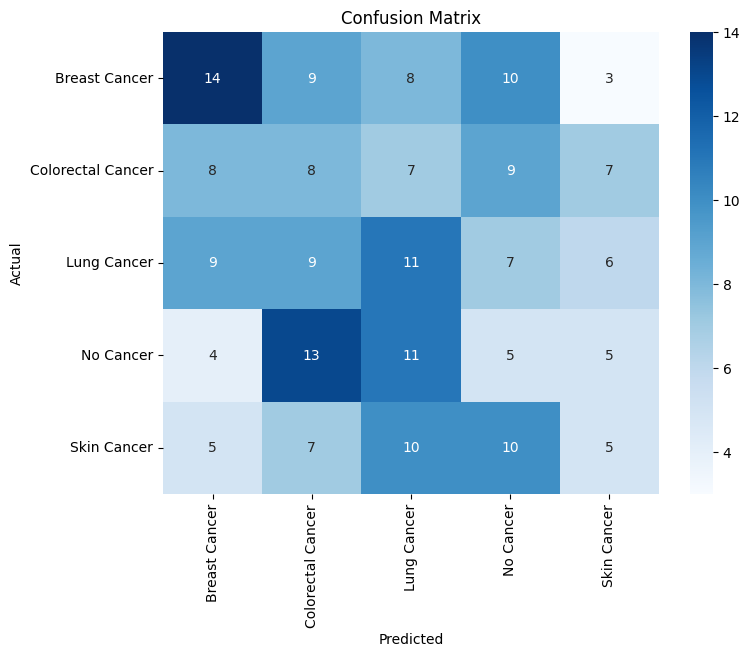


Model saved as 'C:\SUDHA\Personal portfolio project\Models\cancer_rf_model.pkl'
Label encoder saved as 'C:\SUDHA\Personal portfolio project\Models\cancer_label_encoder.pkl'


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

# Load the dataset
data_path = 'C:\SUDHA\Personal portfolio project\datasets\cancer.csv'  # Replace with the correct path if necessary
data = pd.read_csv(data_path)

# Inspect the dataset
print("Dataset Info:")
print(data.info())
print("\nFirst few rows:")
print(data.head())

# Define features (X) and target (y)
X = data.drop(columns=['Cancer_Type'])
y = data['Cancer_Type']

# Encode the target variable into numeric labels
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = rf_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Performance:")
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Save the trained model and the label encoder
model_path = 'C:\SUDHA\Personal portfolio project\Models\cancer_rf_model.pkl'
encoder_path = 'C:\SUDHA\Personal portfolio project\Models\cancer_label_encoder.pkl'
joblib.dump(rf_model, model_path)
joblib.dump(label_encoder, encoder_path)

print(f"\nModel saved as '{model_path}'")
print(f"Label encoder saved as '{encoder_path}'")


In [2]:
import numpy as np
import pandas as pd
import joblib

# Load the saved model and label encoder
model_path = 'C:\SUDHA\Personal portfolio project\Models\cancer_rf_model.pkl'  # Update with correct path
encoder_path = 'C:\SUDHA\Personal portfolio project\Models\cancer_label_encoder.pkl'
rf_model = joblib.load(model_path)
label_encoder = joblib.load(encoder_path)

# Define a function to take user input and make a prediction
def test_cancer_model():
    print("Enter the following details (1 for Yes, 0 for No):")
    try:
        # Collect user inputs for symptoms
        fatigue = int(input("Fatigue: "))
        weight_loss = int(input("Weight Loss: "))
        pain = int(input("Pain: "))
        lump = int(input("Lump: "))
        bleeding = int(input("Bleeding: "))
        cough = int(input("Cough: "))
        difficulty_swallowing = int(input("Difficulty Swallowing: "))
        skin_changes = int(input("Skin Changes: "))
        fever = int(input("Fever: "))

        # Create a feature array for prediction
        features = np.array([[fatigue, weight_loss, pain, lump, bleeding, cough,
                               difficulty_swallowing, skin_changes, fever]])
        
        # Make a prediction
        prediction = rf_model.predict(features)
        probabilities = rf_model.predict_proba(features)

        # Decode the predicted label
        predicted_label = label_encoder.inverse_transform(prediction)[0]

        # Output the result
        print(f"\nPredicted Cancer Type: {predicted_label}")
        print("Confidence for each type:")
        for i, class_label in enumerate(label_encoder.classes_):
            print(f"{class_label}: {probabilities[0][i]:.2%}")
    
    except ValueError as e:
        print("\nInvalid input! Please ensure numerical values (1 or 0) are entered.")
        print(f"Error: {e}")

# Call the function
test_cancer_model()


<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:7: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:7: SyntaxWarning: invalid escape sequence '\S'
C:\Users\Sudhanshu\AppData\Local\Temp\ipykernel_10816\3957313694.py:6: SyntaxWarning: invalid escape sequence '\S'
  model_path = 'C:\SUDHA\Personal portfolio project\Models\cancer_rf_model.pkl'  # Update with correct path
C:\Users\Sudhanshu\AppData\Local\Temp\ipykernel_10816\3957313694.py:7: SyntaxWarning: invalid escape sequence '\S'
  encoder_path = 'C:\SUDHA\Personal portfolio project\Models\cancer_label_encoder.pkl'


Enter the following details (1 for Yes, 0 for No):

Predicted Cancer Type: Skin Cancer
Confidence for each type:
Breast Cancer: 24.95%
Colorectal Cancer: 0.00%
Lung Cancer: 29.04%
No Cancer: 0.00%
Skin Cancer: 46.01%


C:\Users\Sudhanshu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Sudhanshu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
